### 00d: Linear Regression With One Parameter Known

Now we know what our job: find $\hat\theta_0, \hat\theta_1$ that minimize the sum of squared errors on our observed dataset.

To keep things simple, let's pretend that we somehow already know that the true $\theta_0 = 100$. So we set our $\hat\theta_0 = 100$. We only need to find the best $\hat\theta_1$. Later we'll see how to find both.

To begin, let's first generate our dataset again.

**Run this for Latex macros.**

\\[
\newcommand{\fpartial}[2]{\frac{\partial #1}{\partial #2}}
\\]

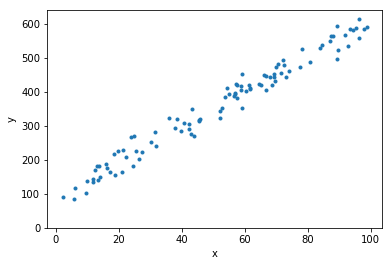

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# So we generate the same data each time!
np.random.seed(0)

class Dataset:
    NOISE_STDDEV = 25
    NUM_SAMPLES = 100
    THETA0 = 100.0
    THETA1 = 5.0

    @classmethod
    def generate_data(cls):
        xs = []
        ys = []
        noises = []
        for _ in range(cls.NUM_SAMPLES):
            # Sample a random x value between 0 and 100.
            x_observation = np.random.uniform(low = 0.0, high = 100.0)
            y_observation = cls.THETA0 + (x_observation * cls.THETA1)
            # Add some "noise" to y
            noise = np.random.normal(scale = cls.NOISE_STDDEV)
            y_observation += noise

            xs.append(x_observation)
            ys.append(y_observation)
            noises.append(noise)

        # Return numpy arrays of the data values.
        return np.array(xs), np.array(ys), np.array(noises)

    def __init__(self):
        self.x, self.y, self.noises = type(self).generate_data()

    def plot(self, axes):
        axes.plot(self.x, self.y, ".")
        axes.set_ylabel("y")
        axes.set_xlabel("x")
        # Even if all data is positive, show y axis
        axes.set_ylim(ymin = np.min((np.min(self.y), 0)))

        return axes

DATASET = Dataset()

DATASET.plot(plt.figure().add_subplot(111))

Next, let's graph how different estimates $\hat\theta_1$ would give different sum of squared errors.

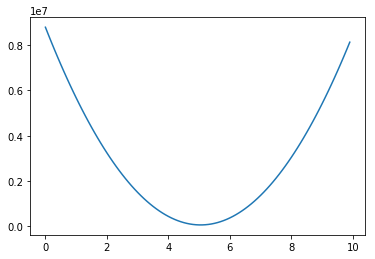

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

def calculate_sse(x, y, theta0, theta1):
    return np.sum(
        ((theta0 + theta1 * x) - y) ** 2
    )

def calculate_many_sses(x, y, theta0, theta1_values):
    # There is a way to do this simply with vectors, but I won't right now.
    error_values = np.zeros(len(theta1_values))
    for idx, theta1_value in enumerate(theta1_values):
        error_values[idx] = (
            calculate_sse(x, y, theta0, theta1_value)
        )
        
    return error_values

def plot_error_graph():
    theta1_values = np.arange(0, 10, 0.1)
    error_values = calculate_many_sses(DATASET.x, DATASET.y, 100, theta1_values)

    plt.plot(
        theta1_values,
        error_values,
        "-"
    )

plot_error_graph()

This is a parabola with a minimum close to $\hat\theta_0 = 5.0$. That makes sense, because the sum of squared errors is a quadratic function in $\theta_1$. Let's expand to see:

\\[
\begin{align}
E(\theta_0, \theta_1)
&=
\sum_{i = 0}^N ((\theta_0 + \theta_1 x_i) - y_i)^2
\\
&=
\sum_{i = 0}^N (\theta_0 + \theta_1 x_i)^2 + 2(\theta_0 + \theta_1 x_i)(-y_i) + (-y_i)^2
\\
&=
\sum_{i = 0}^N \theta_0^2 + 2 \theta_0\theta_1 x_i + \theta_1^2 x_i^2 - 2 \theta_0 y_i - 2 \theta_1 x_i y_i + y_i^2
\\
&=
\sum_{i = 0}^N
    \theta_1^2 x_i^2
    - 2 \theta_1 x_i y_i
    + 2 \theta_0\theta_1 x_i
    + (\theta_0^2 - 2 \theta_0 y_i + y_i^2)
\\
&=
\sum_{i = 0}^N
    x_i^2 \theta_1^2
    + 2(\theta_0 x_i - x_i y_i) \theta_1
    + (\theta_0^2 - 2 \theta_0 y_i + y_i^2)
\\
&=
\left( \sum_{i = 0}^N x_i^2 \right) \theta_1^2
+ \left(
    \sum_{i = 0}^N 2(\theta_0 x_i - x_i y_i)
\right) \theta_1
+ \left(
    \sum_{i = 0}^N \theta_0^2 - 2 \theta_0 y_i + y_i^2
\right)
\end{align}
\\]

Here I have moved things around, treating $x_i, y_i, \theta_0$ all as constants, and $\theta_1$ as the only variable. Now you can see it is a quadratic function.

Okay! Let's use our gradient descent method to find the best $\hat\theta_1$: the one that minimizes this error function with $\hat\theta_0 = 100$ taken for granted.

First we need to find the derivative of $E$ with respect to changes in $\theta_1$. Because $E$ is a function of *two* variables, we write $\fpartial{E}{\theta_1}(\theta_0, \theta_1)$ to make it clear that we are talking about the derivative with respect to $\theta_1$, and $\theta_0$ will remain constant.

Calculamus! Let us calculate!

\\[
\begin{align}
\fpartial{E}{\theta_1}(\theta_0, \theta_1)
&=
\fpartial{}{\theta_1} \left(
    \left( \sum_{i = 0}^N x_i^2 \right) \theta_1^2
    + \left(
        \sum_{i = 0}^N 2(\theta_0 x_i - x_i y_i)
    \right) \theta_1
    + \left(
        \sum_{i = 0}^N \theta_0^2 - 2 \theta_0 y_i + y_i^2
    \right)
\right)
\\
&=
2 \left( \sum_{i = 0}^N x_i^2 \right) \theta_1
+ \left(
    \sum_{i = 0}^N 2(\theta_0 x_i - x_i y_i)
\right)
\end{align}
\\]

We're ready to go! Let's just write the function that will calculate this derivative! 

0.0


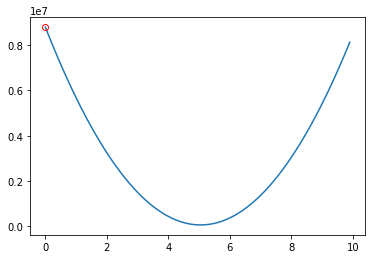

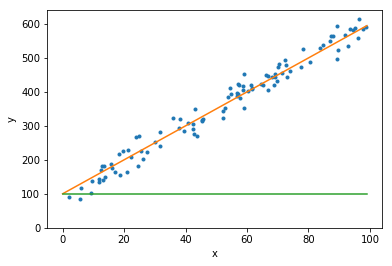

1.73068891293


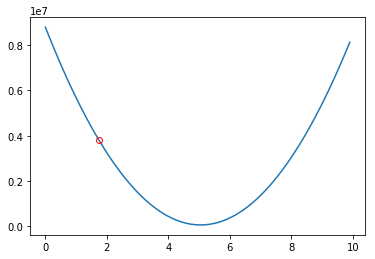

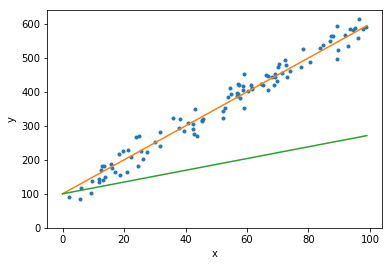

2.86792472412


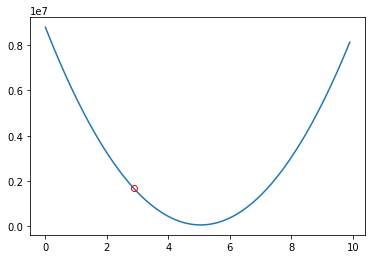

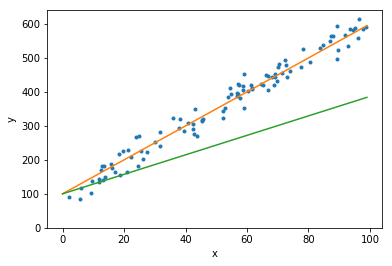

3.61520245877


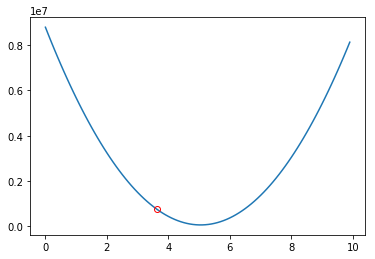

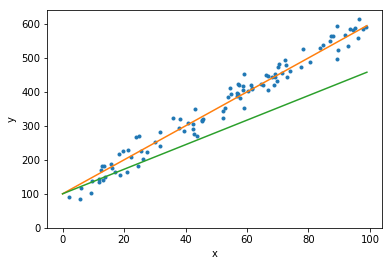

4.10623871283


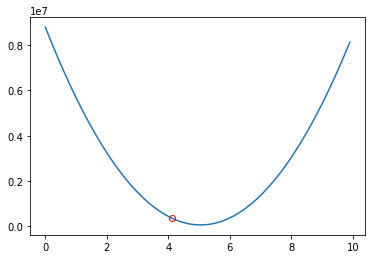

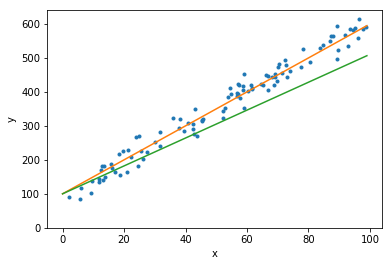

4.42889867126


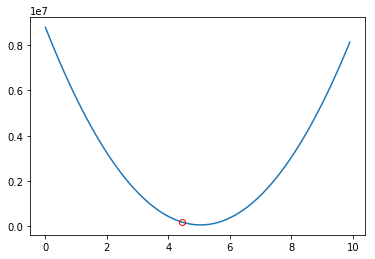

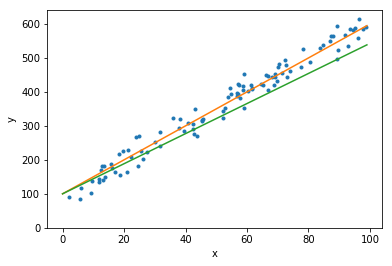

4.64091855352


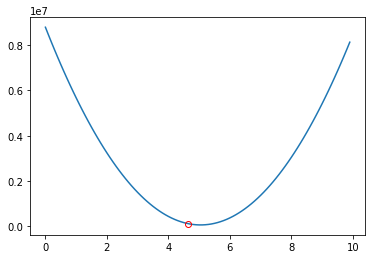

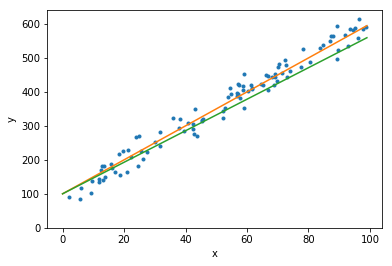

4.78023683366


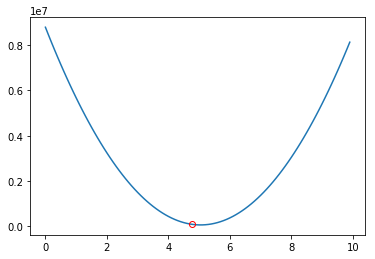

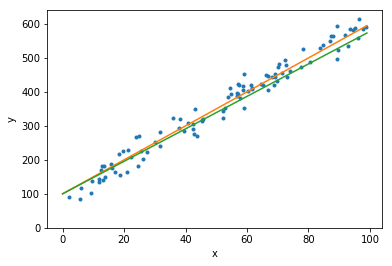

4.87178288572


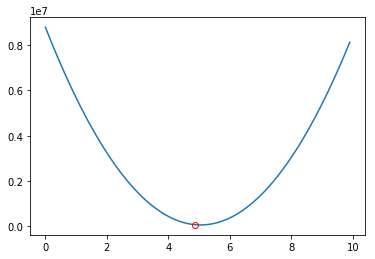

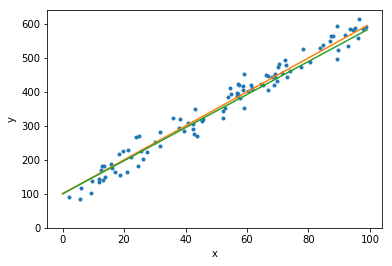

4.93193780322


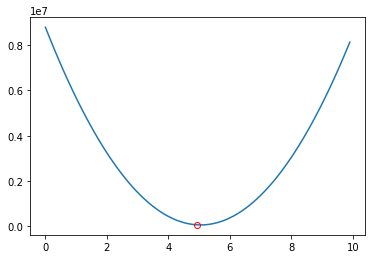

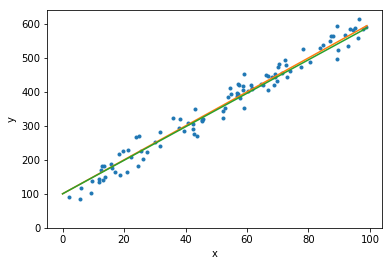

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def error_deriv_wrt_theta1(theta0, theta1):
    return (
        2 * np.sum(DATASET.x * DATASET.x) * theta1
        + np.sum(2 * (theta0 * DATASET.x - DATASET.x * DATASET.y))
    )

def plot_model(theta0, theta1):
    x_range = np.arange(0, 100)
    y_estimate = theta0 + theta1 * x_range
    plt.plot(x_range, y_estimate, "-")

LEARNING_RATE = 5e-7

theta1_estimate = 0.0
for _ in range(10):
    print(theta1_estimate)
    
    # Show where we are on the error parabola
    plot_error_graph()
    plt.plot(
        theta1_estimate,
        calculate_sse(DATASET.x, DATASET.y, 100, theta1_estimate),
        'o',
        color = 'red',
        markerfacecolor = 'none'
    )
    plt.show()

    # Also let's show the true model and the learned model
    DATASET.plot(plt.figure().add_subplot(111))
    plot_model(100, 5.0)
    plot_model(100, theta1_estimate)
    plt.show()

    # Update to a better theta1 estimate
    error_deriv_value = error_deriv_wrt_theta1(100, theta1_estimate)
    if error_deriv_value < 0:
        theta1_estimate += LEARNING_RATE * np.abs(error_deriv_value)
    elif error_deriv_value > 0:
        theta1_estimate -= LEARNING_RATE * np.abs(error_deriv_value)


This is great! We're doing it!

Our next step will be to learn *both* parameters $\theta_0, \theta_1$, without already knowing that $\theta_0 = 100$. That'll be our next notebook!